<a href="https://colab.research.google.com/github/danemiles/projects/blob/main/Weather_Variability_Analysis_20230214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Longitudinal Weather Variability (Temperature, Precipitations, etc.)**

_by Dane Miles_

_February 14, 2023_

In [ ]:
# install meteostat package for weather data
!pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import packages
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Monthly, Normals
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# get lat and long for given city, state, country
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
city = "Indianapolis"
state = "IN"
country = "US"
loc = geolocator.geocode(city+','+state+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 39.7683331 
longtitude is:- -86.1583502


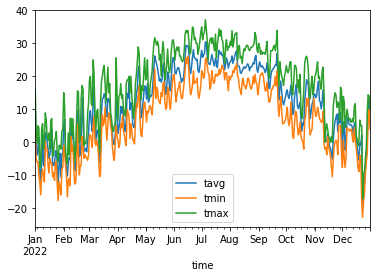

In [ ]:
# code modified from meteostat github
# Set time period
start = datetime(2022, 1, 1)
end = datetime(2022, 12, 31)

# Create Point for location in geopy
location = Point(loc.latitude, loc.longitude)

# Get daily data
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

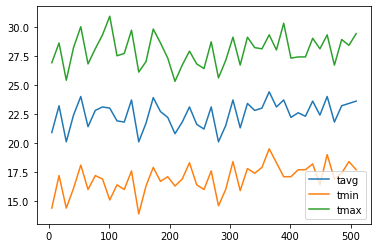

In [ ]:
# test case: plot monthly mean temperature by month, year
y_1 = 1980
y_2 = 2022

start = datetime(y_1,1,1)
end = datetime(y_2,12,31)
comp_month = 6 # 1 = Jan, 2 = Feb, etc.

location = Point(loc.latitude, loc.longitude)

data = Monthly(location, start, end)
data = data.fetch()

# move time from index to its own column
data.reset_index(inplace=True)
data = data.rename(columns = {'index':'date'})
data.dtypes # looks like the new column "time" is still a datetime field

# let's look only at a given month
data_mon = data.loc[data['time'].dt.month == comp_month]

# plot results
data_mon.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()



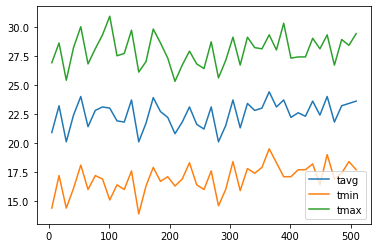

In [ ]:
# let's look only at a given month
data_mon = data.loc[data['time'].dt.month == comp_month]

# plot results
data_mon.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()


In [ ]:
# let's add a trendline to our above graph

# first, let's add a year column
data_mon['year'] = data_mon['time'].dt.year

# second, let's set the index to the year
# data_mon = data_mon.set_index('year')

# third, let's set the x array to the year and the y to the tavg
x = data_mon['year'].to_numpy()
y = data_mon['tavg'].to_numpy()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0, 0.5, 'Avg Temperature (C)')

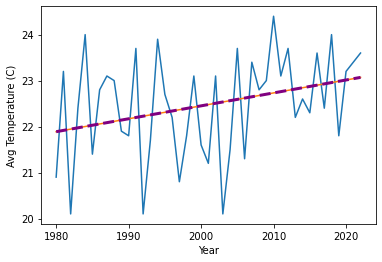

In [ ]:
#create plot
plt.plot(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))

#add custom trendline to plot
plt.plot(x, p(x), color="purple", linewidth=3, linestyle="--")

#add labels
plt.xlabel('Year')
plt.ylabel('Avg Temperature (C)')



---


#**Part 2:** Loop through daily data to create monthly standard deviations

In [ ]:
# let's go back to the daily data. we'll do this for just one city.
y_1 = 1980
y_2 = 2022

start = datetime(y_1,1,1)
end = datetime(y_2,12,31)
comp_month = 6 # 1 = Jan, 2 = Feb, etc.

location = Point(loc.latitude, loc.longitude)

data = Daily(location, start, end)
data = data.fetch()
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1980-01-01,-1.5,-2.8,0.6,0.0,0.0,318.0,9.4,22.3,1016.3,30.0
1980-01-02,-1.5,-2.2,-0.6,0.0,0.0,NaN,10.7,20.5,1018.7,0.0
1980-01-03,-0.7,-2.2,1.1,0.0,0.0,NaN,11.8,31.3,1022.7,0.0
1980-01-04,-2.5,-3.9,-1.1,1.5,25.0,28.0,19.5,33.5,1019.6,0.0
1980-01-05,-4.5,-6.7,-3.3,0.3,25.0,NaN,13.4,29.5,1020.7,84.0


In [ ]:
# we'll add a couple extra columns of data
data.reset_index(inplace=True)
data = data.rename(columns = {'index':'time'})

data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

# reset index to time
df_day = data
df_day.set_index('time')
df_day.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,year,month
0,1980-01-01,-1.5,-2.8,0.6,0.0,0.0,318.0,9.4,22.3,1016.3,30.0,1980,1
1,1980-01-02,-1.5,-2.2,-0.6,0.0,0.0,NaN,10.7,20.5,1018.7,0.0,1980,1
2,1980-01-03,-0.7,-2.2,1.1,0.0,0.0,NaN,11.8,31.3,1022.7,0.0,1980,1
3,1980-01-04,-2.5,-3.9,-1.1,1.5,25.0,28.0,19.5,33.5,1019.6,0.0,1980,1
4,1980-01-05,-4.5,-6.7,-3.3,0.3,25.0,NaN,13.4,29.5,1020.7,84.0,1980,1


In [ ]:
# from the daily table, let's calculate variance by month and year
df_day_tavg = df_day.groupby(['year', 'month'])['tavg'].describe()
df_day_tavg

df_day_prcp = df_day.groupby(['year', 'month'])['prcp'].describe()
df_day_prcp

df_day_wspd = df_day.groupby(['year', 'month'])['wspd'].describe()
df_day_wspd

df_day_pres = df_day.groupby(['year', 'month'])['pres'].describe()
df_day_pres

df_day_tsun = df_day.groupby(['year', 'month'])['tsun'].describe()
df_day_tsun

count        mean         std  min    25%    50%    75%    max
year month                                                                
1980 1       31.0  216.000000  214.640164  0.0    3.0  162.0  420.0  612.0
     2       29.0  266.275862  250.333334  0.0   12.0  198.0  552.0  648.0
     3       31.0  288.774194  298.253886  0.0    0.0  192.0  636.0  726.0
     4       30.0  354.800000  320.574742  0.0   25.5  213.0  676.5  798.0
     5       31.0  448.645161  274.804846  0.0  213.0  498.0  720.0  864.0
...           ...         ...         ...  ...    ...    ...    ...    ...
2022 8        0.0         NaN         NaN  NaN    NaN    NaN    NaN    NaN
     9        0.0         NaN         NaN  NaN    NaN    NaN    NaN    NaN
     10       0.0         NaN         NaN  NaN    NaN    NaN    NaN    NaN
     11       0.0         NaN         NaN  NaN    NaN    NaN    NaN    NaN
     12       0.0         NaN         NaN  NaN    NaN    NaN    NaN    NaN

[516 rows x 8 columns]

In [ ]:
# create monthly table
data = Monthly(location, start, end)
data = data.fetch()

data.reset_index(inplace=True)
data = data.rename(columns = {'index':'time'})

data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

# reset index to time
df_mon = data
df_mon.set_index('time')
df_mon.head()

,time,tavg,tmin,tmax,prcp,wspd,pres,tsun,year,month
0,1980-01-01,-2.1,-5.9,2.0,42.8,15.5,1020.4,6696.0,1980,1
1,1980-02-01,-4.8,-9.9,-0.7,46.6,13.3,1021.6,7722.0,1980,2
2,1980-03-01,2.2,-2.5,7.0,108.2,17.1,1016.7,8952.0,1980,3
3,1980-04-01,9.4,3.7,15.2,53.4,15.6,1013.5,10644.0,1980,4
4,1980-05-01,18.0,11.6,23.9,57.4,13.1,1013.8,13908.0,1980,5


In [ ]:
# reset keys for the merge
df_mon.reset_index(inplace=True)
df_day_tavg.reset_index(inplace=True)

In [ ]:
# merge daily variance stats to monthly table

merge_df = pd.merge(df_mon,df_day_tavg[['year','month','std']], \
                    on=['year','month'], how='left')
merge_df.rename(columns={"std": "tavg_std"},errors="raise")

merge_df

,index,time,tavg,tmin,tmax,prcp,wspd,pres,tsun,year,month,std
0,0,1980-01-01,-2.1,-5.9,2.0,42.8,15.5,1020.4,6696.0,1980,1,4.541796
1,1,1980-02-01,-4.8,-9.9,-0.7,46.6,13.3,1021.6,7722.0,1980,2,5.563813
2,2,1980-03-01,2.2,-2.5,7.0,108.2,17.1,1016.7,8952.0,1980,3,5.796291
3,3,1980-04-01,9.4,3.7,15.2,53.4,15.6,1013.5,10644.0,1980,4,4.587095
4,4,1980-05-01,18.0,11.6,23.9,57.4,13.1,1013.8,13908.0,1980,5,3.787151
...,...,...,...,...,...,...,...,...,...,...,...,...
511,511,2022-08-01,23.6,18.6,29.2,112.7,12.7,1016.2,NaN,2022,8,1.790873
512,512,2022-09-01,19.9,14.7,25.4,53.8,13.0,1017.4,NaN,2022,9,4.262239
513,513,2022-10-01,12.4,6.1,18.9,36.1,16.0,1017.7,NaN,2022,10,4.061852
514,514,2022-11-01,6.8,1.7,12.1,36.3,16.7,1020.7,NaN,2022,11,6.591998


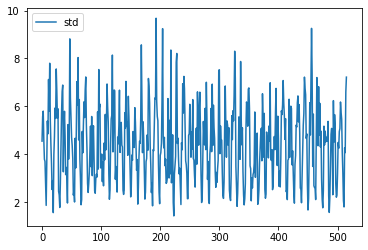

In [ ]:
# the above has a problem, column not renaming. why? probably small issue.
# let's plot the StDevs

merge_df.set_index(['year','month'])
merge_df.plot(y=['std'])
plt.show()

Text(0, 0.5, 'Standard Deviation of Daily Temperature (C)')

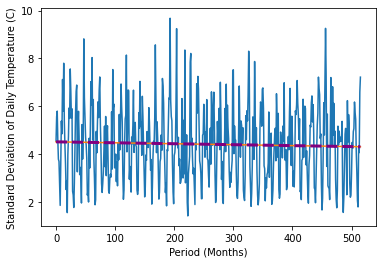

In [ ]:
# let's add a trendline to our above graph

x = merge_df['index'].to_numpy()
y = merge_df['std'].to_numpy()

plt.plot(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))

#add custom trendline to plot
plt.plot(x, p(x), color="purple", linewidth=3, linestyle="--")

#add labels
plt.xlabel('Period (Months)')
plt.ylabel('Standard Deviation of Daily Temperature (C)')

---
#**Part 3:** Evaluating Results and Next Steps

Using Indianapolis data from 1980 - 2022, it seems as though total temperature standard deviation has decreased.

Next, I'd like to look for correlations. Namely, I'm interested in:
1.   Humidity trends over time
2.   Precipitation trends over time
3.   Corr(Humidity, Sunny Days per Month)
4.   Corr(Humidity, Avg. Temp.)
5.   Any noticeable increased variability in barometric pressure

One more thing! It may be nice to move this to GitHub for posterity sake, as well as building up a portfolio. [Link to instructions.](https://medium.com/analytics-vidhya/how-to-use-google-colab-with-github-via-google-drive-68efb23a42d)

